In [0]:
!apt-get install openslide-tools
!pip install openslide-python

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libopenslide0
Suggested packages:
  libtiff-tools
The following NEW packages will be installed:
  libopenslide0 openslide-tools
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 92.5 kB of archives.
After this operation, 268 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libopenslide0 amd64 3.4.1+dfsg-2 [79.8 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 openslide-tools amd64 3.4.1+dfsg-2 [12.7 kB]
Fetched 92.5 kB in 1s (103 kB/s)
Selecting previously unselected package libopenslide0.
(Reading database ... 130824 files and directories currently installed.)
Preparing to unpack .../libopenslide0_3.4.1+dfsg-2_

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from openslide import open_slide, __library_version__ as openslide_version
import os

In [0]:
#mount gdrive
from google.colab import drive

#check path to file
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**Params to be changed**

In [0]:
import pickle

root = 'gdrive/My Drive/adl_pro/'
slide_number = '110'
lowest_level = 1
result_path = 'tumor_110_predicted_mask_merged'
  
with open(root + 'data/test/tumor_110_predicted_mask_level1_final.pkl','rb') as f:
  data_level1 = pickle.load(f)
  
with open(root + 'data/test/tumor_110_predicted_mask_level3_final.pkl','rb') as f:
  data_level3 = pickle.load(f)
  
with open(root + 'data/test/tumor_110_predicted_mask_level4_final.pkl','rb') as f:
  data_level4 = pickle.load(f)
  
with open(root + 'data/test/tumor_110_predicted_mask_level5_final.pkl','rb') as f:
  data_level5 = pickle.load(f)
  
with open(root + 'data/test/tumor_110_predicted_mask_level6_final.pkl','rb') as f:
  data_level6 = pickle.load(f)

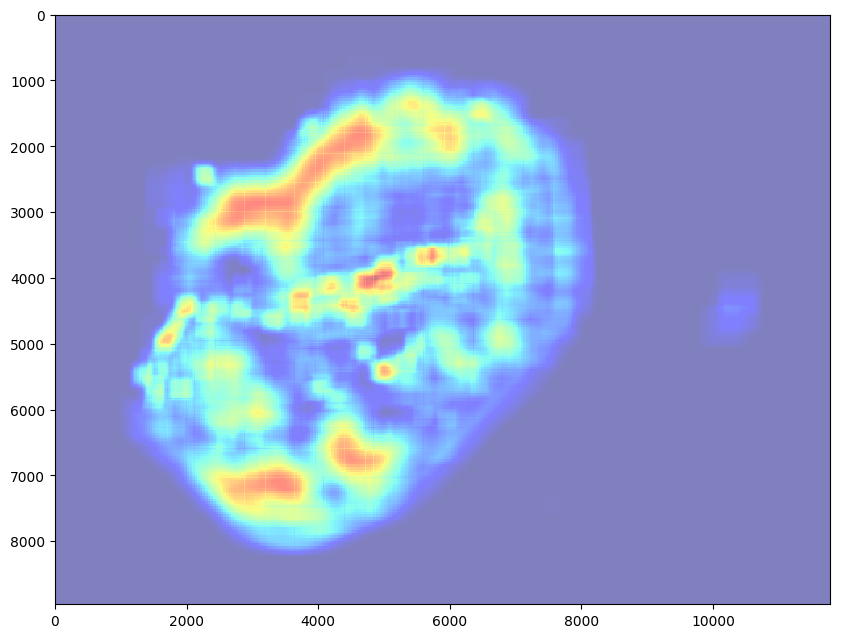

In [0]:
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(data_level3, cmap='jet', alpha=0.5)

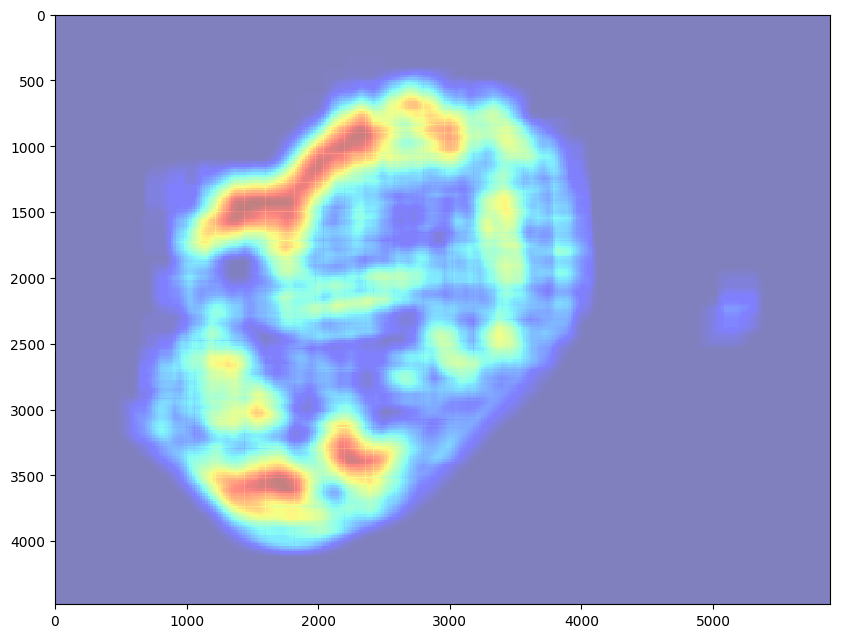

In [0]:
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(data_level4, cmap='jet', alpha=0.5)

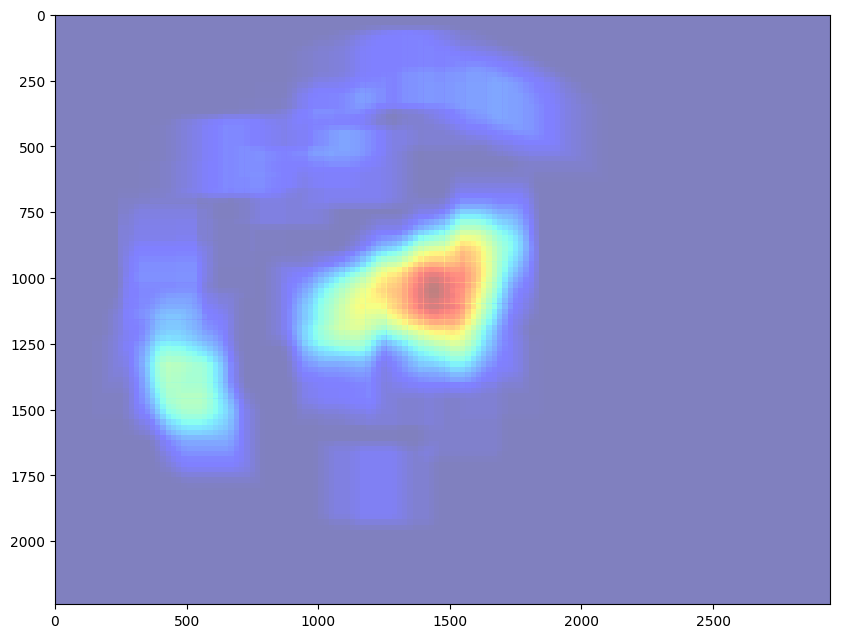

In [0]:
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(data_level5, cmap='jet', alpha=0.5)

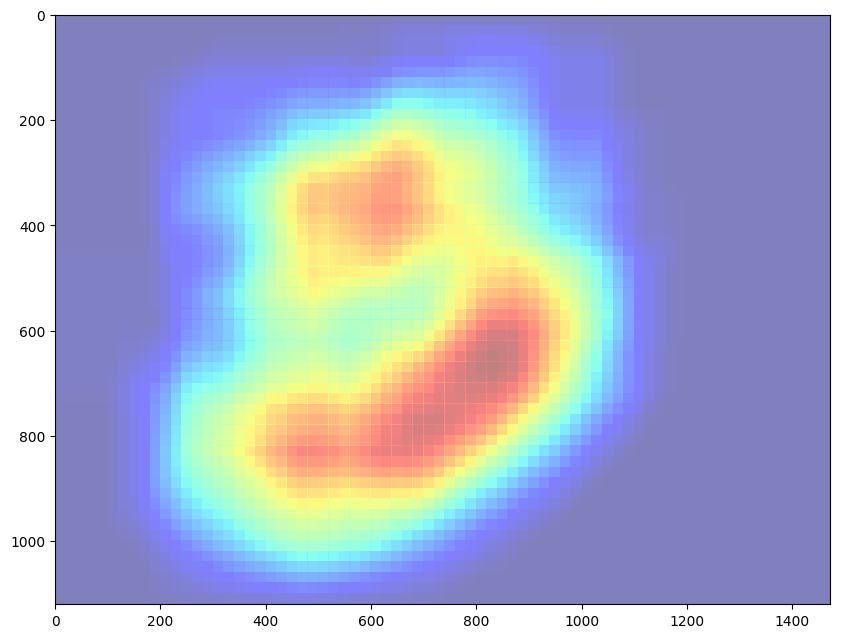

In [0]:
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(data_level6, cmap='jet', alpha=0.5)

In [0]:
merge_result = np.zeros(data_level3.shape)

for x in range(data_level6.shape[0]):
  for y in range(data_level6.shape[1]):
    merge_result[8*x:8*x+8,8*y:8*y+8] += data_level3[8*x:8*x+8,8*y:8*y+8] + data_level6[x,y] / 8
    
for x in range(data_level5.shape[0]):
  for y in range(data_level5.shape[1]):
    merge_result[4*x:4*x+4,4*y:4*y+4] += data_level5[x,y] / 4
    
for x in range(data_level4.shape[0]):
  for y in range(data_level4.shape[1]):
    merge_result[2*x:2*x+2,2*y:2*y+2] += data_level4[x,y] / 2

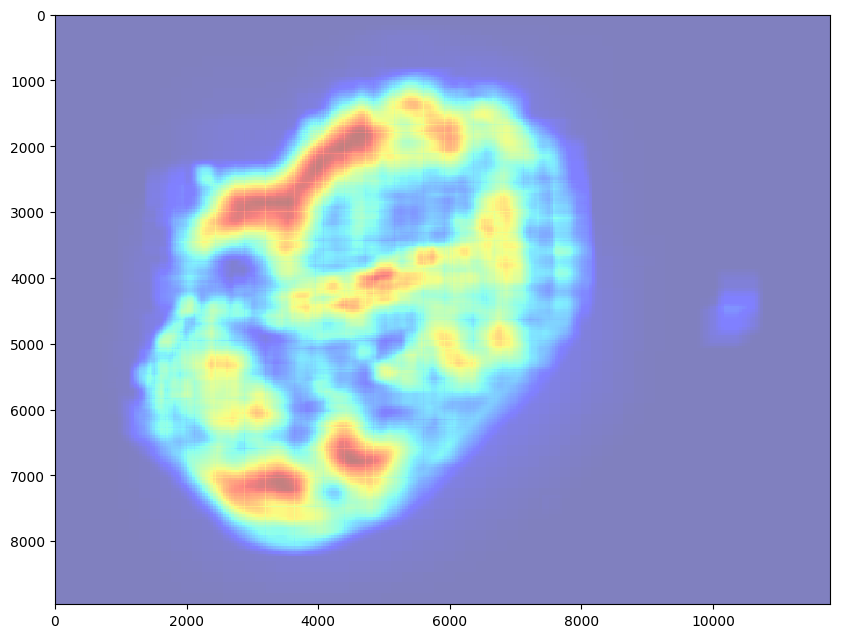

In [0]:
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(merge_result, cmap='jet', alpha=0.5)

**No need to change anything below this.**

In [0]:
def read_slide(slide, x, y, level, width, height, as_float=False):
    im = slide.read_region((x,y), level, (width, height))
    im = im.convert('RGB') # drop the alpha channel
    if as_float:
        im = np.asarray(im, dtype=np.float32)
    else:
        im = np.asarray(im)
    assert im.shape == (height, width, 3)
    return im

In [0]:
mask = open_slide(root + 'data/test/tumor_' + slide_number + '_mask.tif')

x = 0
y = 0

width=mask.level_dimensions[lowest_level][0]
height=mask.level_dimensions[lowest_level][1]


mask_image = read_slide(mask, x, y, lowest_level, width, height)
mask_image = mask_image[:,:,0]

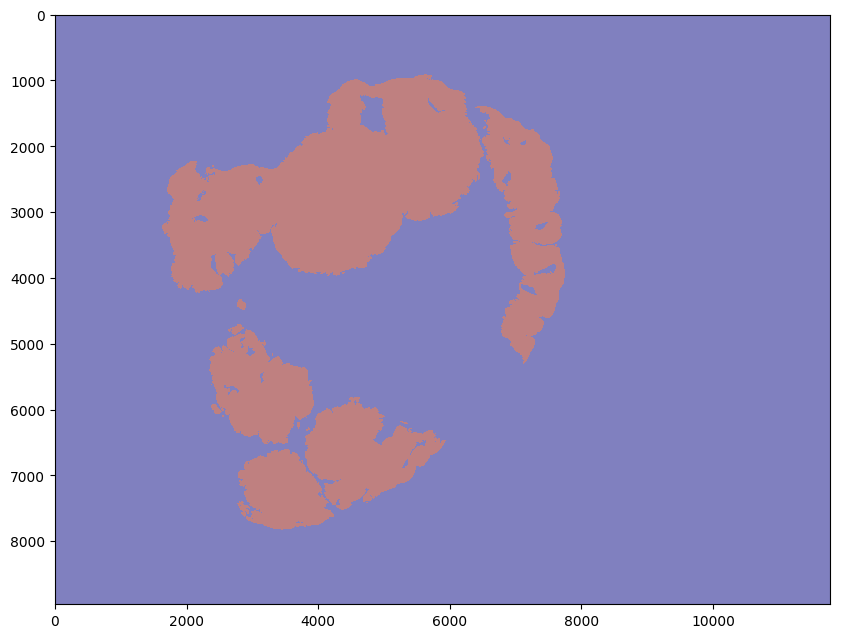

In [0]:
plt.figure(figsize=(10,10), dpi=100)
plt.imshow(mask_image, cmap='jet', alpha=0.5)

In [0]:
with open(root + 'data/test/' + result_path + '_final.pkl','wb') as f:
  pickle.dump(merge_result,f)